# Portafolio con codigos neftali

## 01 Introduction

In [1]:
import sys
print(sys.version)

3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [2]:
import lseg.data as ld
ld.open_session()

<lseg.data.session.Definition object at 0x1ecb7e97c90 {name='workspace'}>

In [3]:
data = ld.get_data(['JPM','RY.TO','8058.T','BA','LMT',
    'NVDA','MSFT.O','SAND.K','VLO','SIEGn.DE'], ['TR.CommonName',"TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])
data

,Instrument,Company Common Name,Price Close,Volume,Price Low,YTD Total Return
0,JPM,JPMorgan Chase & Co,292.91,8188506,291.44,24.230232
1,RY.TO,Royal Bank of Canada,199.77,2435616,199.35,18.287094
2,8058.T,Mitsubishi Corp,3462.0,8801400,3457.0,36.748484
3,BA,Boeing Co,230.95,5954965,228.09,30.480226
4,LMT,Lockheed Martin Corp,459.11,1477595,452.765,-3.47666
5,NVDA,NVIDIA Corp,667200.0,1334,666500.0,10.298216
6,MSFT.O,Microsoft Corp,498.2,16771015,495.03,18.844903
7,SAND.K,Sandstorm Gold Ltd,11.59,3384050,11.5,108.898253
8,VLO,Valero Energy Corp,157.36,2458975,153.62,31.614508
9,SIEGn.DE,Siemens AG,230.65,795352,228.1,25.14629


In [4]:
dax = data
dax.set_index('Instrument')['YTD Total Return']

Instrument
JPM          24.230232
RY.TO        18.287094
8058.T       36.748484
BA           30.480226
LMT           -3.47666
NVDA         10.298216
MSFT.O       18.844903
SAND.K      108.898253
VLO          31.614508
SIEGn.DE      25.14629
Name: YTD Total Return, dtype: Float64

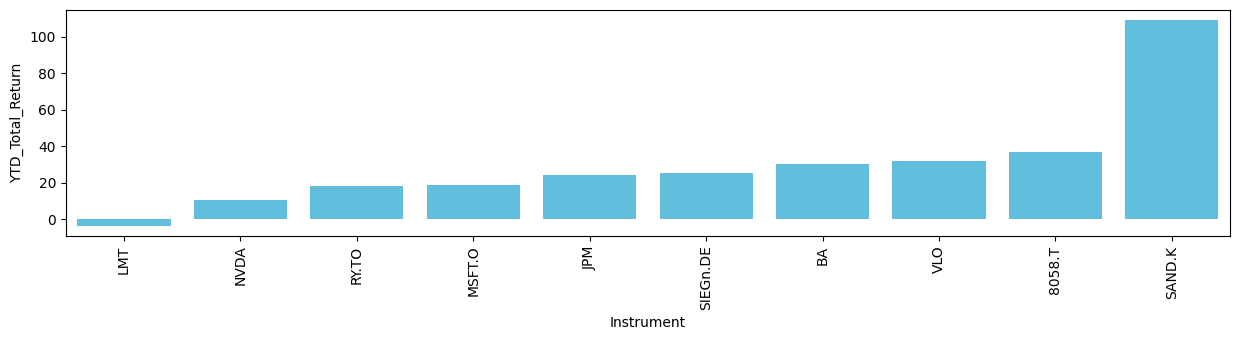

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]

bar_plot = sns.barplot(x=dax2.index, y=dax2['YTD_Total_Return'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [6]:
portfolio = dax['Instrument'][0:10].tolist()
portfolio

['JPM',
 'RY.TO',
 '8058.T',
 'BA',
 'LMT',
 'NVDA',
 'MSFT.O',
 'SAND.K',
 'VLO',
 'SIEGn.DE']

In [7]:
import datetime as dt
today = dt.date.today()
delta_day = today - dt.timedelta(days=100)
print(today, delta_day)

2025-09-09 2025-06-01


In [8]:
df_ts = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")

prices = df_ts.rename(columns={'Price Close': portfolio[0]})
prices

JPM,JPM
Date,
2025-06-02,264.66
2025-06-03,266.27
2025-06-04,264.22
2025-06-05,261.95
2025-06-06,265.73
...,...
2025-09-02,299.7
2025-09-03,299.51
2025-09-04,303.82


In [9]:
for i in portfolio[1:]:
    print(i)
    w = ld.get_history([i], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")
    w1 = w.rename(columns={'Price Close': i})
    prices = prices.join(w1, lsuffix="_left", rsuffix="_right")

RY.TO


8058.T
BA
BA
LMT
LMT
NVDA
NVDA
MSFT.O
MSFT.O
SAND.K
SAND.K
VLO
VLO
SIEGn.DE
SIEGn.DE


In [10]:
prices

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO,SIEGn.DE
Date,,,,,,,,,,
2025-06-02,264.66,175.16,2904.0,211.47,478.82,<NA>,461.97,9.29,128.3,213.65
2025-06-03,266.27,174.93,2865.5,213.43,480.17,580000,462.97,9.36,130.95,214.05
2025-06-04,264.22,174.25,2882.0,211.98,482.21,581660,463.87,9.38,126.54,218.05
2025-06-05,261.95,173.48,2861.0,209.02,478.03,<NA>,467.68,9.53,126.88,219.25
2025-06-06,265.73,174.57,2874.5,210.8,481.69,583000,470.38,9.19,128.35,218.8
...,...,...,...,...,...,...,...,...,...,...
2025-09-02,299.7,199.53,3453.0,237.38,452.5,684980,505.12,11.35,154.28,228.7
2025-09-03,299.51,200.97,3359.0,232.38,449.06,676860,505.35,11.23,155.38,229.45
2025-09-04,303.82,201.72,3385.0,230.75,456.85,<NA>,507.97,11.22,155.39,230.05


In [11]:
import numpy as np

prices = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")


prices['Close'] = prices['Price Close'].astype(float)
prices[portfolio[0]] = np.log(prices['Close'].div(prices['Close'].shift(1)))
daily_returns = prices.drop(['Price Close', 'Close'], axis=1)
daily_returns 

JPM,JPM
Date,
2025-06-06,NaN
2025-06-13,-0.002940
2025-06-20,0.037230
2025-06-27,0.043094
2025-07-03,0.030494
2025-07-11,-0.031365
2025-07-18,0.015256
2025-07-25,0.024921
2025-08-01,-0.031466


In [12]:
for instrument in range(1,len(portfolio)):
    print(instrument, portfolio[instrument])
    prices = ld.get_history([portfolio[instrument]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")
    prices['Close'] = prices['Price Close'].astype(float)
    prices[portfolio[instrument]] = np.log(prices['Close'].div(prices['Close'].shift(1)))
    prices = prices.drop(['Price Close', 'Close'], axis=1)
    daily_returns = daily_returns.join(prices)

1 RY.TO
2 8058.T
2 8058.T
3 BA
3 BA
4 LMT
4 LMT
5 NVDA
5 NVDA
6 MSFT.O
6 MSFT.O
7 SAND.K
7 SAND.K
8 VLO
8 VLO
9 SIEGn.DE
9 SIEGn.DE


In [13]:
daily_returns

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO,SIEGn.DE
Date,,,,,,,,,,
2025-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-13,-0.002940,-0.005860,-0.010140,-0.050994,0.009833,0.004450,0.009690,0.016190,0.043899,-0.017753
2025-06-20,0.037230,0.007406,-0.011310,-0.007868,-0.033211,0.003137,0.005124,-0.022741,0.050809,-0.026637
2025-06-27,0.043094,0.016225,0.019186,0.076495,-0.025767,0.091925,0.038100,-0.011013,-0.046493,0.062281
2025-07-03,0.030494,NaN,NaN,0.006365,0.008533,NaN,0.005830,0.064331,0.070857,NaN
2025-07-11,-0.031365,0.004557,-0.008427,0.049337,0.010731,0.048857,0.008941,0.023603,0.056932,0.032118
2025-07-18,0.015256,0.009765,-0.006585,0.010961,-0.007622,0.045136,0.013283,-0.029853,-0.046131,0.005143
2025-07-25,0.024921,-0.006444,0.053811,0.016090,-0.096762,0.039110,0.007150,-0.002092,-0.029018,0.013732
2025-08-01,-0.031466,-0.019473,-0.002309,-0.049069,-0.000380,-0.002226,0.020043,-0.012645,-0.063914,-0.065213


<Axes: >

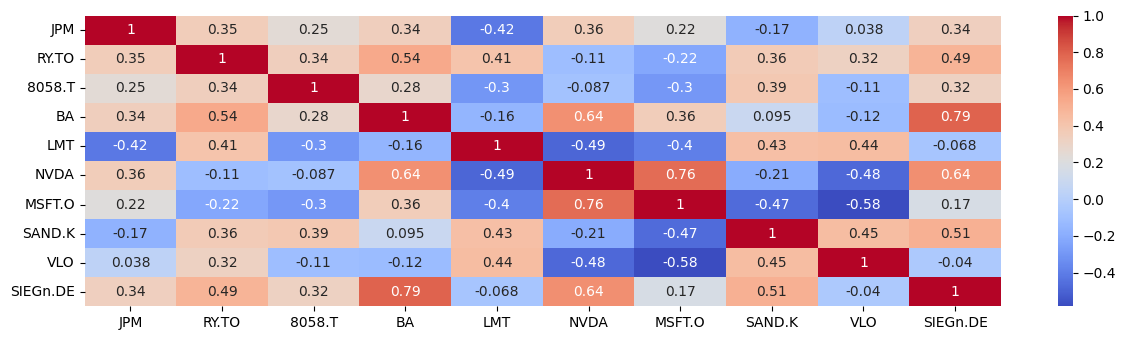

In [14]:
correlacion = daily_returns.corr()
sns.heatmap(correlacion, annot = True, fmt='.2g',cmap= 'coolwarm')

## 04 Backtesting

In [15]:
from datafromsource import DataFromSource
import talib as ta


In [16]:
aapl = DataFromSource('AAPL.O')
df_aapl = aapl.get_prices()

jpm = DataFromSource('JPM')
df_jpm = jpm.get_prices()

ry = DataFromSource('RY.TO')
df_ry = ry.get_prices()

to = DataFromSource('8058.T')
df_to = to.get_prices()

ba = DataFromSource('BA')
df_ba = ba.get_prices()

lmt = DataFromSource('LMT')
df_lmt = lmt.get_prices()

nvda = DataFromSource('NVDA')
df_nvda = nvda.get_prices()

msft = DataFromSource('MSFT.O')
df_msft = msft.get_prices()

sand = DataFromSource('SAND.K')
df_sand = sand.get_prices()

vlo = DataFromSource('VLO')
df_vlo = vlo.get_prices()

sie = DataFromSource('SIEGn.DE')
df_sie = sie.get_prices()

In [17]:
df_vlo

VLO,close
Date,
2024-09-09,134.16
2024-09-10,136.09
2024-09-11,132.90
2024-09-12,134.12
2024-09-13,134.26
...,...
2025-09-02,154.28
2025-09-03,155.38
2025-09-04,155.39


In [18]:
for t in [5, 21, 63]:
    df_nvda[f'SMA_{t}'] = ta.SMA(df_nvda['close'],
                                  timeperiod=t)
df_nvda

NVDA,close,SMA_5,SMA_21,SMA_63
Date,,,,
2024-09-09,447700.0,NaN,NaN,NaN
2024-09-10,460000.0,NaN,NaN,NaN
2024-09-11,494800.0,NaN,NaN,NaN
2024-09-13,497640.0,NaN,NaN,NaN
2024-09-16,495000.0,479028.0,NaN,NaN
...,...,...,...,...
2025-09-01,710800.0,722448.0,726316.190476,642905.079365
2025-09-02,684980.0,713644.0,724667.619048,645913.968254
2025-09-03,676860.0,701356.0,721899.047619,648827.301587


In [19]:
plt.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'svg'

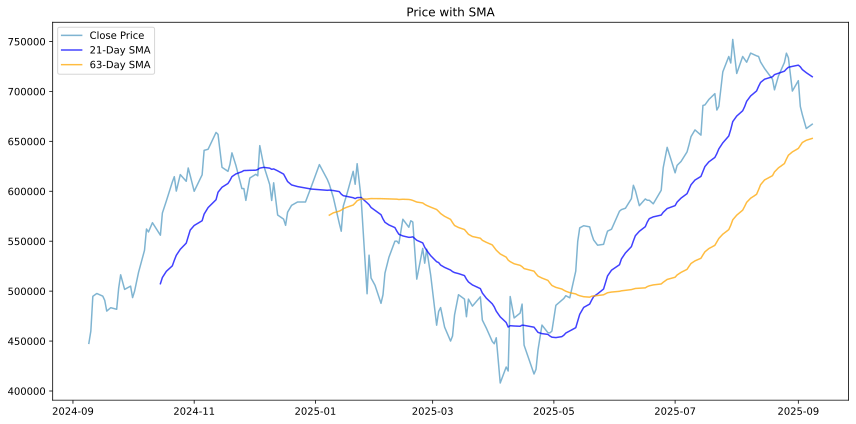

In [20]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Price and SMAs
plt.plot(df_nvda['close'], label='Close Price', alpha=0.5)
plt.plot(df_nvda['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
plt.plot(df_nvda['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')

plt.title('Price with SMA')
plt.legend()
plt.show()

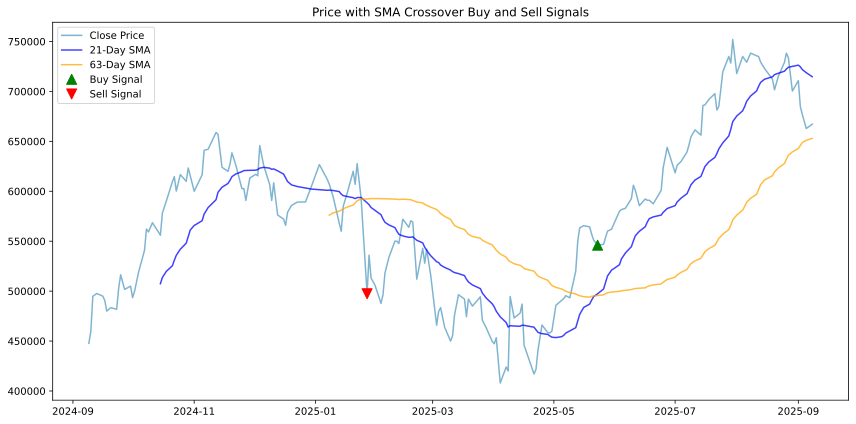

In [21]:
# Generate Buy and Sell signals
df_nvda['Buy_Signal'] = np.where((df_nvda['SMA_21'] > df_nvda['SMA_63']) & (df_nvda['SMA_21'].shift(1) <= df_nvda['SMA_63'].shift(1)), 1, 0)
df_nvda['Sell_Signal'] = np.where((df_nvda['SMA_21'] < df_nvda['SMA_63']) & (df_nvda['SMA_21'].shift(1) >= df_nvda['SMA_63'].shift(1)), -1, 0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Price and SMAs
plt.plot(df_nvda['close'], label='Close Price', alpha=0.5)
plt.plot(df_nvda['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
plt.plot(df_nvda['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')

# Plot Buy Signals
plt.plot(df_nvda[df_nvda['Buy_Signal'] == 1].index, df_nvda['close'][df_nvda['Buy_Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot Sell Signals
plt.plot(df_nvda[df_nvda['Sell_Signal'] == -1].index, df_nvda['close'][df_nvda['Sell_Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Price with SMA Crossover Buy and Sell Signals')
plt.legend()
plt.show()

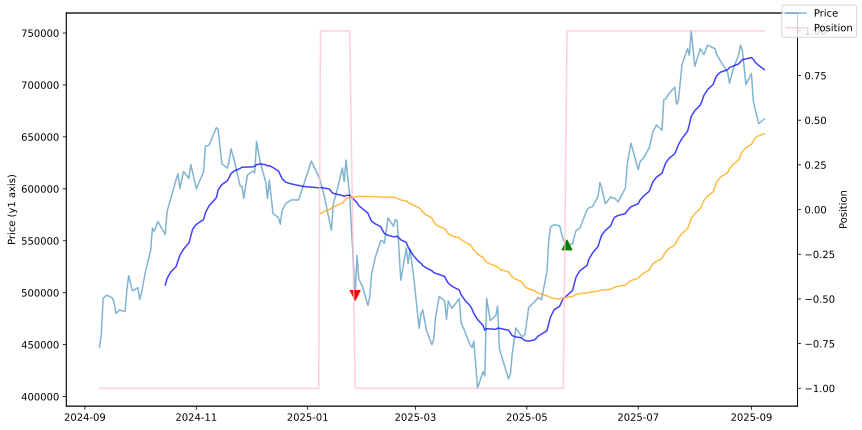

In [22]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator

df_nvda['position'] = np.where((df_nvda['SMA_21'] > df_nvda['SMA_63']),  1,
                             -1) 

fig,ax1 = plt.subplots(figsize=(12, 6))
l1, = ax1.plot(df_nvda.index, df_nvda['close'], label='Close Price', alpha=0.5) #Your Price field
ax1.set_ylabel('Price (y1 axis)')
ax1.plot(df_nvda['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
ax1.plot(df_nvda['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')
ax1.plot(df_nvda[df_nvda['Buy_Signal'] == 1].index, df_nvda['close'][df_nvda['Buy_Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
ax1.plot(df_nvda[df_nvda['Sell_Signal'] == -1].index, df_nvda['close'][df_nvda['Sell_Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')


ax2 = ax1.twinx() ##Using twinx to make ax2 as secondary axis for ax1
l2, = ax2.plot(df_nvda.index,df_nvda['position'], alpha=0.75, color='pink') #Your sales field
ax2.set_ylabel('Position')

fig.legend([l1, l2], ["Price", "Position"])

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

ax1.xaxis.set_major_locator(xtick_locator)
ax1.xaxis.set_major_formatter(xtick_formatter)

In [23]:
df_nvda['Returns'] = np.log(df_nvda['close'] / df_nvda['close'].shift(1))
df_nvda['Strategy'] = df_nvda['position'].shift(1) * df_nvda['Returns']  
df_nvda.round(4).head()
df_nvda = df_nvda.dropna(how='all')
df_nvda.dropna(inplace=True)
np.exp(df_nvda[['Returns', 'Strategy']].sum())

NVDA
Returns     1.090517
Strategy    0.919438
dtype: float64

In [24]:
df_nvda[['Returns', 'Strategy']].std() * 252 ** 0.5


NVDA
Returns     0.608566
Strategy    0.608571
dtype: float64

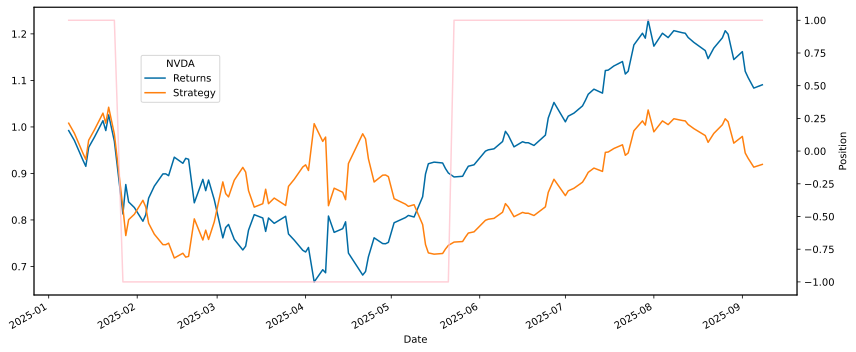

In [25]:
ax1 = df_nvda[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(12,5))

ax2 = ax1.twinx() ##Using twinx to make ax2 as secondary axis for ax1
l2, = ax2.plot(df_nvda.index,df_nvda['position'], alpha=0.75, color='pink') #Your sales field
ax2.set_ylabel('Position')

fig.legend([l1, l2], ["Price", "Position"])

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

ax1.xaxis.set_major_locator(xtick_locator)
ax1.xaxis.set_major_formatter(xtick_formatter)

ax1.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_03.png');

In [30]:
# Backtest para todo el portafolio: calcula Returns y Strategy para cada ticker y guarda en una tabla
import os
import numpy as np
import pandas as pd
from datafromsource import DataFromSource
import talib as ta

def backtest_portfolio(tickers, sma_short=21, sma_long=63):
    """Ejecuta el backtest de crossover SMA para cada ticker en `tickers` y devuelve/guarda una tabla con las columnas <TICKER>_Returns y <TICKER>_Strategy."""
    results = pd.DataFrame()
    for t in tickers:
        print(f'Backtesting: {t}')
        try:
            df = DataFromSource(t).get_prices()
        except Exception as e:
            print(f'  Error obteniendo datos para {t}:', e)
            continue
        # Asegurar cópia y tipos numéricos
        df = df.copy()
        if 'close' not in df.columns:
            print(f'  Columna close no encontrada para {t}, se omite')
            continue
        df['close'] = df['close'].astype(float)
        # Calcular SMAs
        df[f'SMA_{sma_short}'] = ta.SMA(df['close'], timeperiod=sma_short)
        df[f'SMA_{sma_long}'] = ta.SMA(df['close'], timeperiod=sma_long)
        # Posición: 1 si SMA_short > SMA_long, sino -1
        df['position'] = np.where(df[f'SMA_{sma_short}'] > df[f'SMA_{sma_long}'], 1, -1)
        # Returns logarítmicos y performance de la estrategia
        df['Returns'] = np.log(df['close'] / df['close'].shift(1))
        df['Strategy'] = df['position'].shift(1) * df['Returns']
        # Seleccionar y renombrar columnas para unir
        sel = df[['Returns', 'Strategy']].rename(columns={'Returns': f'{t}_Returns', 'Strategy': f'{t}_Strategy'})
        # Unir por índice de fecha (outer para mantener fechas distintas)
        if results.empty:
            results = sel
        else:
            results = results.join(sel, how='outer')
    # Guardar resultados en outputs/
    out_dir = 'outputs'
    os.makedirs(out_dir, exist_ok=True)
    out_path = os.path.join(out_dir, 'backtest_returns_strategy.csv')
    results.to_csv(out_path, index=True)
    print(f'Resultados guardados en: {out_path}')
    return results

# Ejecutar para el objeto `portfolio` si está definido como lista de tickers o como PortfolioData (manejar ambos casos)
tickers = None
try:
    # Si ya es una lista/tupla
    if isinstance(portfolio, (list, tuple)):
        tickers = list(portfolio)
    else:
        # Intentar detectar si es un objeto PortfolioData y extraer la lista interna
        try:
            from portfoliodata import PortfolioData
        except Exception:
            PortfolioData = None

        if PortfolioData is not None and isinstance(portfolio, PortfolioData):
            # Probar nombres comunes de atributos / métodos que podrían contener tickers
            candidate = None
            for attr in ('tickers', 'symbols', 'assets', 'portfolio', 'instruments', 'tickers_list'):
                if hasattr(portfolio, attr):
                    candidate = getattr(portfolio, attr)
                    if callable(candidate):
                        candidate = candidate()
                    break
            # Probar método get_tickers si existe
            if candidate is None and hasattr(portfolio, 'get_tickers'):
                candidate = portfolio.get_tickers()
            # Si encontramos algo listable, convertir a lista
            if isinstance(candidate, (list, tuple, pd.Series, np.ndarray)):
                tickers = list(candidate)
        else:
            # Intentar convertir el objeto a lista si es iterable
            try:
                tickers = list(portfolio)
            except Exception:
                tickers = None
except NameError:
    tickers = None

if not tickers:
    print('No se encontró la variable `portfolio` con los tickers. Llama backtest_portfolio(tickers) manualmente.')
else:
    backtest_results = backtest_portfolio(tickers)
    backtest_results.head()

Backtesting: JPM
Backtesting: RY.TO
Backtesting: RY.TO
Backtesting: 8058.T
Backtesting: 8058.T
Backtesting: BA
Backtesting: BA
Backtesting: LMT
Backtesting: LMT
Backtesting: NVDA
Backtesting: NVDA
Backtesting: MSFT.O
Backtesting: MSFT.O
Backtesting: SAND.K
Backtesting: SAND.K
Backtesting: VLO
Backtesting: VLO
Backtesting: SIEGn.DE
Backtesting: SIEGn.DE
Resultados guardados en: outputs\backtest_returns_strategy.csv
Resultados guardados en: outputs\backtest_returns_strategy.csv


## Markowitz

In [26]:
from datafromsource import DataFromSource

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

from numpy.random import random, uniform, dirichlet, choice
from numpy.linalg import inv
from scipy.optimize import minimize
from matplotlib.ticker import FuncFormatter
import math
from datetime import datetime, timedelta
import pandas_datareader.data as web
import datetime as dt

In [27]:
portfolio = [
    'JPM','RY.TO','8058.T','BA','LMT',
    'NVDA','MSFT.O','SAND.K','VLO','SIEGn.DE'
]

In [28]:
from portfoliodata import PortfolioData
portfolio = PortfolioData(portfolio, interval_period="1W", initial = 365*5)
weekly_returns = portfolio.get_portfolio_returns()
weekly_returns

Error calculating returns for JPM: 'JPM'
JPM
Error calculating returns for RY.TO: 'RY.TO'
An exception occurred for stock: RY.TO
Error calculating returns for RY.TO: 'RY.TO'
An exception occurred for stock: RY.TO
Error calculating returns for 8058.T: '8058.T'
An exception occurred for stock: 8058.T
Error calculating returns for 8058.T: '8058.T'
An exception occurred for stock: 8058.T
Error calculating returns for BA: 'BA'
An exception occurred for stock: BA
Error calculating returns for BA: 'BA'
An exception occurred for stock: BA
Error calculating returns for LMT: 'LMT'
An exception occurred for stock: LMT
Error calculating returns for LMT: 'LMT'
An exception occurred for stock: LMT
Error calculating returns for NVDA: 'NVDA'
An exception occurred for stock: NVDA
Error calculating returns for NVDA: 'NVDA'
An exception occurred for stock: NVDA
Error calculating returns for MSFT.O: 'MSFT.O'
An exception occurred for stock: MSFT.O
Error calculating returns for MSFT.O: 'MSFT.O'
An exceptio

In [ ]:
weekly_returns

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO,SIEGn.DE
Date,,,,,,,,,,
2025-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-20,0.037230,0.007406,-0.011310,-0.007868,-0.033211,0.003137,0.005124,-0.022741,0.050809,-0.026637
2025-06-27,0.043094,0.016225,0.019186,0.076495,-0.025767,0.091925,0.038100,-0.011013,-0.046493,0.062281
2025-07-03,0.030494,NaN,NaN,0.006365,0.008533,NaN,0.005830,0.064331,0.070857,NaN
2025-07-11,-0.031365,0.004557,-0.008427,0.049337,0.010731,0.048857,0.008941,0.023603,0.056932,0.032118
2025-07-18,0.015256,0.009765,-0.006585,0.010961,-0.007622,0.045136,0.013283,-0.029853,-0.046131,0.005143
2025-07-25,0.024921,-0.006444,0.053811,0.016090,-0.096762,0.039110,0.007150,-0.002092,-0.029018,0.013732
2025-08-01,-0.031466,-0.019473,-0.002309,-0.049069,-0.000380,-0.002226,0.020043,-0.012645,-0.063914,-0.065213
2025-08-08,-0.002110,0.027180,0.031852,0.032019,0.010914,0.028016,-0.003957,0.099831,0.000826,0.087403


In [ ]:
# Se identifican activos que no tengan la historia de rendimientos completa, los vacios llenar con valor del dia anterior
s = weekly_returns.isnull().apply(sum, axis=0) # count the number of nan in each column
for col in weekly_returns: 
    # rellenar NaNs con el valor de la semana anterior (forward fill)
    weekly_returns[col] = weekly_returns[col].ffill()
weekly_returns

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO,SIEGn.DE
Date,,,,,,,,,,
2025-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-20,0.037230,0.007406,-0.011310,-0.007868,-0.033211,0.003137,0.005124,-0.022741,0.050809,-0.026637
2025-06-27,0.043094,0.016225,0.019186,0.076495,-0.025767,0.091925,0.038100,-0.011013,-0.046493,0.062281
2025-07-03,0.030494,0.016225,0.019186,0.006365,0.008533,0.091925,0.005830,0.064331,0.070857,0.062281
2025-07-11,-0.031365,0.004557,-0.008427,0.049337,0.010731,0.048857,0.008941,0.023603,0.056932,0.032118
2025-07-18,0.015256,0.009765,-0.006585,0.010961,-0.007622,0.045136,0.013283,-0.029853,-0.046131,0.005143
2025-07-25,0.024921,-0.006444,0.053811,0.016090,-0.096762,0.039110,0.007150,-0.002092,-0.029018,0.013732
2025-08-01,-0.031466,-0.019473,-0.002309,-0.049069,-0.000380,-0.002226,0.020043,-0.012645,-0.063914,-0.065213
2025-08-08,-0.002110,0.027180,0.031852,0.032019,0.010914,0.028016,-0.003957,0.099831,0.000826,0.087403


In [ ]:
weekly_returns.shape


(13, 10)

# Set Parameters

In [ ]:
weekly_returns.columns

Index(['JPM', 'RY.TO', '8058.T', 'BA', 'LMT', 'NVDA', 'MSFT.O', 'SAND.K',
       'VLO', 'SIEGn.DE'],
      dtype='object')

In [ ]:
#.4'GOLD.N', .2'TSLA.O', .1'GOOGL.O', .05'MSFT.O', .05'PPG.N', .02'CX.N', .18'GM.N'

In [ ]:
stocks = weekly_returns.columns


In [ ]:
n_obs, n_assets = weekly_returns.shape
n_assets, n_obs

(10, 13)

In [ ]:
NUM_PF = 100000 # no of portfolios to simulate


In [ ]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))
x0

array([0.07229874, 0.06181263, 0.07687634, 0.19210473, 0.16616335,
       0.02777211, 0.05979623, 0.02363485, 0.11768422, 0.20185681])

# Annualization Factor


In [ ]:
periods_per_year = round(weekly_returns.resample('A').size().mean())
periods_per_year

13

# Compute Mean Returns, Covariance and Precision Matrix


In [ ]:
mean_returns = weekly_returns.mean()
cov_matrix = weekly_returns.cov()
cov_matrix

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO,SIEGn.DE
JPM,0.000669,0.000155,0.000118,0.000280,-0.000369,0.000503,0.000104,-0.000167,0.000079,0.000450
RY.TO,0.000155,0.000304,0.000095,0.000282,0.000283,-0.000063,-0.000060,0.000250,0.000345,0.000362
8058.T,0.000118,0.000095,0.000406,0.000093,-0.000189,-0.000071,-0.000096,0.000305,-0.000011,0.000257
BA,0.000280,0.000282,0.000093,0.001154,-0.000140,0.000898,0.000271,0.000131,-0.000067,0.001140
LMT,-0.000369,0.000283,-0.000189,-0.000140,0.001201,-0.000570,-0.000247,0.000564,0.000721,-0.000007
NVDA,0.000503,-0.000063,-0.000071,0.000898,-0.000570,0.002088,0.000549,0.000059,-0.000436,0.001429
MSFT.O,0.000104,-0.000060,-0.000096,0.000271,-0.000247,0.000549,0.000299,-0.000302,-0.000511,0.000152
SAND.K,-0.000167,0.000250,0.000305,0.000131,0.000564,0.000059,-0.000302,0.001398,0.000823,0.000982
VLO,0.000079,0.000345,-0.000011,-0.000067,0.000721,-0.000436,-0.000511,0.000823,0.002304,0.000287
SIEGn.DE,0.000450,0.000362,0.000257,0.001140,-0.000007,0.001429,0.000152,0.000982,0.000287,0.002017


In [ ]:
precision_matrix = pd.DataFrame(inv(cov_matrix), index=stocks, columns=stocks)
precision_matrix

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO,SIEGn.DE
JPM,13305.869615,-7260.245298,-5693.462447,12757.555828,2225.694257,4044.915765,-10097.617510,13414.396817,-3971.718890,-16212.083775
RY.TO,-7260.245298,37684.854405,-10449.928920,1629.292900,-10869.314487,16430.996404,-25458.253565,8355.813070,-5289.037081,-17829.801864
8058.T,-5693.462447,-10449.928920,14107.466334,-10032.792843,5292.432355,-8113.429154,18909.754556,-14117.630726,5403.478149,17473.742381
BA,12757.555828,1629.292900,-10032.792843,21203.044717,-569.391469,12773.193439,-26715.116185,20476.950388,-7041.716553,-29856.513040
LMT,2225.694257,-10869.314487,5292.432355,-569.391469,5482.550983,-3365.484179,6106.557393,-3676.460405,1292.728337,4656.951761
NVDA,4044.915765,16430.996404,-8113.429154,12773.193439,-3365.484179,17743.709991,-30898.841242,14503.490593,-6596.818274,-26427.614670
MSFT.O,-10097.617510,-25458.253565,18909.754556,-26715.116185,6106.557393,-30898.841242,67864.234438,-26268.717922,14282.789375,47094.095198
SAND.K,13414.396817,8355.813070,-14117.630726,20476.950388,-3676.460405,14503.490593,-26268.717922,25868.891392,-8118.551915,-34023.971925
VLO,-3971.718890,-5289.037081,5403.478149,-7041.716553,1292.728337,-6596.818274,14282.789375,-8118.551915,4090.586409,12104.737321
SIEGn.DE,-16212.083775,-17829.801864,17473.742381,-29856.513040,4656.951761,-26427.614670,47094.095198,-34023.971925,12104.737321,52011.592472


# Risk-Free Rate

In [ ]:
today = dt.date.today()
initial_day = today - dt.timedelta(days=365*5)

In [ ]:
treasury_10yr_monthly = (web.DataReader('DGS10', 'fred', initial_day, today)
                         .resample('ME')
                         .last()
                         .div(periods_per_year)
                         .div(100)
                         .squeeze())

In [ ]:
treasury_10yr_monthly

DATE
2020-09-30    0.000531
2020-10-31    0.000677
2020-11-30    0.000646
2020-12-31    0.000715
2021-01-31    0.000854
                ...   
2025-05-31    0.003392
2025-06-30    0.003262
2025-07-31    0.003362
2025-08-31    0.003254
2025-09-30    0.003154
Freq: ME, Name: DGS10, Length: 61, dtype: float64

In [ ]:
rf_rate = 0.000995


# Simualate Random Portfolios

In [ ]:
def simulate_portfolios(mean_ret, cov, rf_rate=rf_rate, short=True):
    alpha = np.full(shape=n_assets, fill_value=.05)
    weights = dirichlet(alpha=alpha, size=NUM_PF)
    if short:
        weights *= choice([-1, 1], size=weights.shape)

    returns = weights @ mean_ret.values + 1
    returns = returns ** periods_per_year - 1
    std = (weights @ weekly_returns.T).std(1)
    std *= np.sqrt(periods_per_year)
    sharpe = (returns - rf_rate) / std
    return pd.DataFrame({'Annualized Standard Deviation': std,
                         'Annualized Returns': returns,
                         'Sharpe Ratio': sharpe}), weights

In [ ]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

In [ ]:
simul_perf

,Annualized Standard Deviation,Annualized Returns,Sharpe Ratio
0,0.100077,0.214811,2.136516
1,0.093013,0.209116,2.237554
2,0.092747,0.003284,0.024676
3,0.066027,0.214087,3.227331
4,0.118466,0.160725,1.348316
...,...,...,...
99995,0.071436,0.227921,3.176624
99996,0.059192,0.048337,0.799795
99997,0.062941,0.057468,0.897243
99998,0.122434,0.158807,1.288956


In [ ]:
simul_wt

array([[2.75096785e-10, 2.28025777e-13, 1.64460891e-15, ...,
        6.28076143e-01, 2.71325299e-33, 4.74556563e-13],
       [4.49519965e-05, 1.06981228e-01, 1.60935496e-04, ...,
        5.55549917e-01, 1.09349869e-27, 1.63987730e-04],
       [1.47315077e-03, 7.17805463e-09, 1.05136677e-03, ...,
        2.81985055e-05, 8.46010165e-08, 1.01493918e-14],
       ...,
       [3.46741385e-10, 3.84697336e-18, 6.20132983e-19, ...,
        2.03378113e-04, 4.73112110e-05, 9.79085162e-25],
       [7.67582968e-05, 2.56931069e-06, 1.05386036e-15, ...,
        7.02644888e-04, 6.47474118e-20, 4.28287539e-02],
       [4.61929754e-17, 9.87667277e-04, 5.63764091e-07, ...,
        1.77353963e-02, 3.20196902e-01, 4.42805059e-01]],
      shape=(100000, 10))

In [ ]:
df = pd.DataFrame(simul_wt)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,1.000855e-01,1.005172e-01,9.905476e-02,1.006594e-01,9.933005e-02,9.928906e-02,1.016850e-01,9.973333e-02,1.004840e-01,9.916180e-02
std,2.446856e-01,2.457240e-01,2.438600e-01,2.461120e-01,2.441854e-01,2.441062e-01,2.472251e-01,2.450057e-01,2.457919e-01,2.438934e-01
min,3.384052e-117,3.614020e-101,2.229307e-127,4.344071e-111,7.524019e-106,3.589472e-118,1.819312e-99,5.923911e-118,7.585783e-102,4.514749e-90
25%,4.011164e-12,4.725186e-12,3.625504e-12,3.856951e-12,4.882989e-12,4.650272e-12,4.261419e-12,4.433735e-12,4.093526e-12,4.210361e-12
50%,4.567814e-06,4.637113e-06,4.008676e-06,4.246110e-06,4.269860e-06,4.034345e-06,5.218225e-06,4.392780e-06,4.402561e-06,4.477751e-06
75%,1.601163e-02,1.553585e-02,1.397389e-02,1.516117e-02,1.461518e-02,1.425570e-02,1.550275e-02,1.422690e-02,1.511784e-02,1.488684e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9
0,2.750968e-10,2.280258e-13,1.644609e-15,3.653732e-01,1.103343e-08,6.443854e-03,1.068031e-04,0.628076,2.713253e-33,4.745566e-13
1,4.495200e-05,1.069812e-01,1.609355e-04,3.369537e-01,1.336319e-04,1.163488e-05,3.052182e-18,0.555550,1.093499e-27,1.639877e-04
2,1.473151e-03,7.178055e-09,1.051367e-03,2.718012e-01,7.255962e-01,4.977126e-05,1.229371e-08,0.000028,8.460102e-08,1.014939e-14
3,5.350018e-07,4.099265e-06,9.211002e-01,4.811755e-06,1.328677e-02,1.414379e-18,5.627318e-02,0.000016,4.540441e-11,9.314799e-03
4,5.374833e-05,3.362534e-14,3.245701e-08,9.603545e-01,3.831218e-03,3.604555e-03,3.131703e-11,0.032156,1.479164e-31,5.487434e-22
...,...,...,...,...,...,...,...,...,...,...
99995,2.020207e-14,7.875038e-06,9.664396e-01,7.213907e-04,1.532357e-10,1.121731e-13,4.245099e-09,0.000133,8.800425e-03,2.389737e-02
99996,3.107432e-08,4.246398e-09,4.513285e-19,9.627097e-16,1.676451e-10,2.769197e-07,9.805923e-01,0.001947,1.745889e-02,1.754196e-06
99997,3.467414e-10,3.846973e-18,6.201330e-19,9.875417e-02,2.538119e-05,4.735426e-03,8.962343e-01,0.000203,4.731121e-05,9.790852e-25
99998,7.675830e-05,2.569311e-06,1.053860e-15,9.561234e-01,3.901371e-13,2.659233e-04,4.191409e-14,0.000703,6.474741e-20,4.282875e-02


# Plot Simulated Portfolios

Max Sharpe: 3.16%, 14.24%


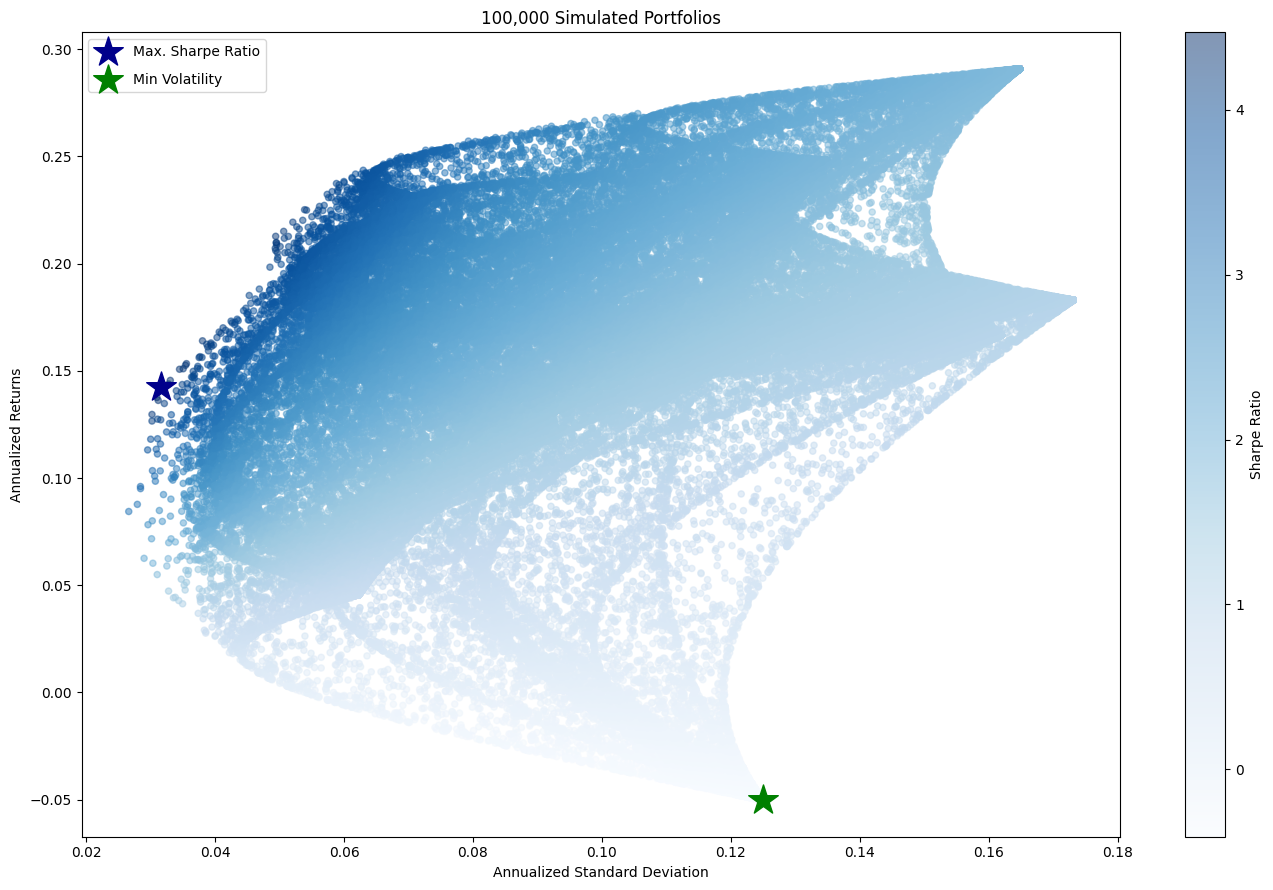

In [ ]:
import warnings
warnings.filterwarnings('ignore')
ax = simul_perf.plot.scatter(x=0, y=1, c=2, cmap='Blues',
                             alpha=0.5, figsize=(14, 9), colorbar=True,
                             title=f'{NUM_PF:,d} Simulated Portfolios')

#max_sharpe_idx = simul_perf.iloc[:, 2].idxmax()
max_sharpe_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
sd, r = simul_perf.iloc[max_sharpe_idx, :2].values
print(f'Max Sharpe: {sd:.2%}, {r:.2%}')
ax.scatter(sd, r, marker='*', color='darkblue', s=500, label='Max. Sharpe Ratio')

#min_vol_idx = simul_perf.iloc[:, 0].idxmin()
min_vol_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].min())[0][0]
sd, r = simul_perf.iloc[min_vol_idx, :2].values
ax.scatter(sd, r, marker='*', color='green', s=500, label='Min Volatility')
plt.legend(labelspacing=1, loc='upper left')
plt.tight_layout()

# Compute Annualize PF Performance



Now we'll set up the quadratic optimization problem to solve for the minimum standard deviation for a given return or the maximum SR.

To this end, define the functions that measure the key metrics:

In [ ]:
def portfolio_std(wt, rt=None, cov=None):
    """Annualized PF standard deviation"""
    return np.sqrt(wt @ cov @ wt * periods_per_year)

In [ ]:
def portfolio_returns(wt, rt=None, cov=None):
    """Annualized PF returns"""
    return (wt @ rt + 1) ** periods_per_year - 1

In [ ]:
def portfolio_performance(wt, rt, cov):
    """Annualized PF returns & standard deviation"""
    r = portfolio_returns(wt, rt=rt)
    sd = portfolio_std(wt, cov=cov)
    return r, sd

# Max Sharpe PF

Define a target function that represents the negative SR for scipy's minimize function to optimize, given the constraints that the weights are bounded by [-1, 1], if short trading is permitted, and [0, 1] otherwise, and sum to one in absolute terms.

In [ ]:
def neg_sharpe_ratio(weights, mean_ret, cov):
    r, sd = portfolio_performance(weights, mean_ret, cov)
    return -(r - rf_rate) / sd

In [ ]:
weight_constraint = {'type': 'eq', 
                     'fun': lambda x: np.sum(np.abs(x))-1}

In [ ]:
def max_sharpe_ratio(mean_ret, cov, short=False):
    return minimize(fun=neg_sharpe_ratio,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=((-1 if short else 0, 1),) * n_assets,
                    constraints=weight_constraint,
                    options={'tol':1e-10, 'maxiter':10000})

# Compute Efficient Frontier

In [ ]:
def min_vol_target(mean_ret, cov, target, short=False):

    def ret_(wt):
        return portfolio_returns(wt, mean_ret)

    constraints = [{'type': 'eq',
                    'fun': lambda x: ret_(x) - target},
                   weight_constraint]

    bounds = ((-1 if short else 0, 1),) * n_assets
    return minimize(portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=constraints,
                    options={'tol': 1e-10, 'maxiter': 10000})

# Min Volatility Portfolio

In [ ]:
def min_vol(mean_ret, cov, short=False):
    bounds = ((-1 if short else 0, 1),) * n_assets

    return minimize(fun=portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=weight_constraint,
                    options={'tol': 1e-10, 'maxiter': 10000})

In [ ]:
def efficient_frontier(mean_ret, cov, ret_range, short=False):
    return [min_vol_target(mean_ret, cov, ret) for ret in ret_range]

## Run Calculation

## Get random PF

In [ ]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)


In [ ]:
print(simul_perf.describe())


       Annualized Standard Deviation  Annualized Returns   Sharpe Ratio
count                  100000.000000       100000.000000  100000.000000
mean                        0.101356            0.155712       1.653482
std                         0.035260            0.077735       0.901673
min                         0.025393           -0.050218      -0.409801
25%                         0.069374            0.120728       1.127473
50%                         0.097737            0.167946       1.581656
75%                         0.126468            0.207946       2.155540
max                         0.173063            0.290844       4.467170


In [ ]:
simul_max_sharpe = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
simul_perf.iloc[simul_max_sharpe]

Annualized Standard Deviation    0.027357
Annualized Returns               0.123204
Sharpe Ratio                     4.467170
Name: 37514, dtype: float64

# Get Max Sharpe PF

In [ ]:
max_sharpe_pf = max_sharpe_ratio(mean_returns, cov_matrix, short=False)
max_sharpe_perf = portfolio_performance(max_sharpe_pf.x, mean_returns, cov_matrix)

In [ ]:
r, sd = max_sharpe_perf
pd.Series({'ret': r, 'sd': sd, 'sr': (r-rf_rate)/sd})

ret    0.136514
sd     0.029602
sr     4.578020
dtype: float64

# Get Min Vol PF

In [ ]:
min_vol_pf = min_vol(mean_returns, cov_matrix, short=False)
min_vol_perf = portfolio_performance(min_vol_pf.x, mean_returns, cov_matrix)

In [ ]:
ret_range = np.linspace(simul_perf.iloc[:, 1].min(), simul_perf.iloc[:, 1].max(), 50)
eff_pf = efficient_frontier(mean_returns, cov_matrix, ret_range, short=True)
eff_pf = pd.Series(dict(zip([p['fun'] for p in eff_pf], ret_range)))

# Plot Result

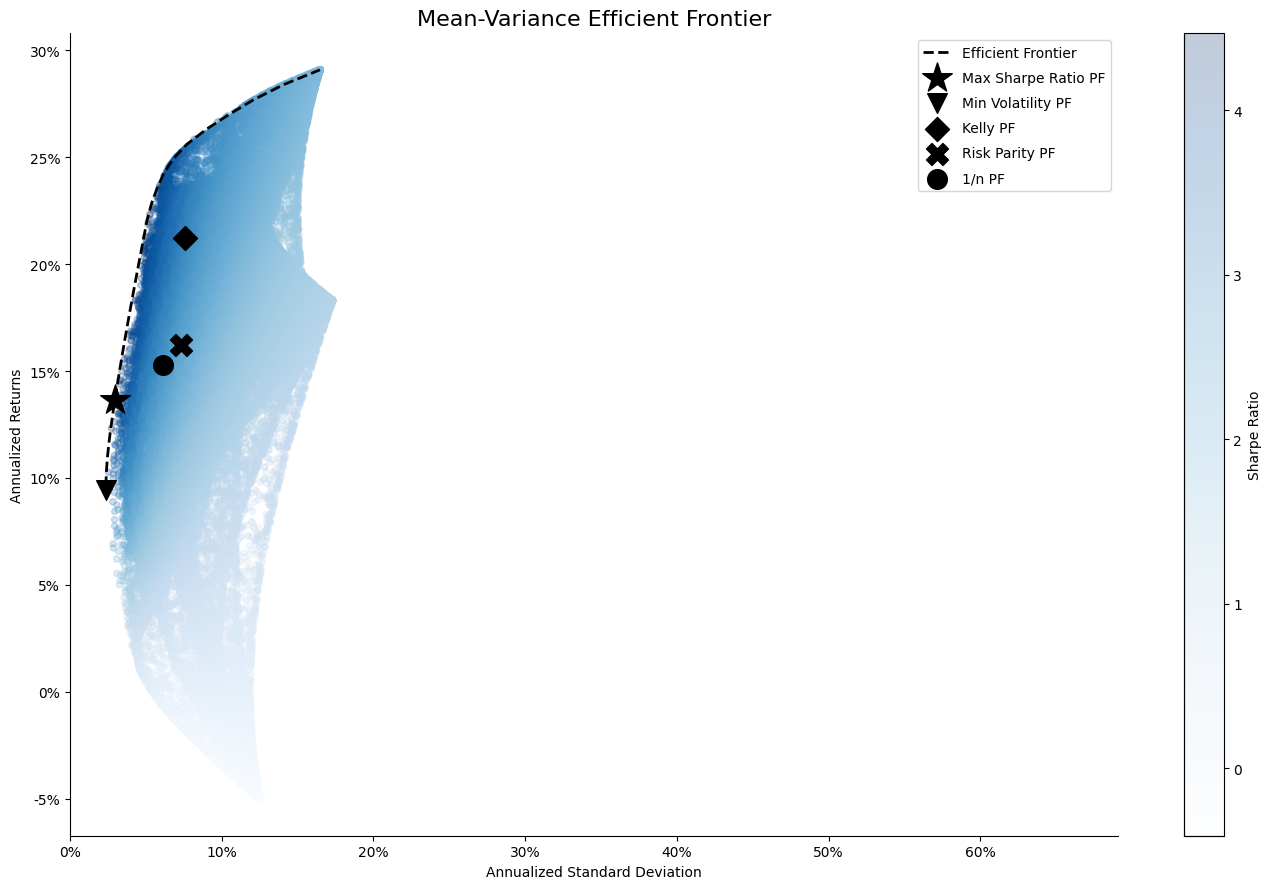

In [ ]:
fig, ax = plt.subplots()
simul_perf.plot.scatter(x=0, y=1, c=2, ax=ax, cmap='Blues',alpha=0.25, 
                        figsize=(14, 9), colorbar=True)

eff_pf[eff_pf.index.min():].plot(linestyle='--', lw=2, ax=ax, c='k',
                                 label='Efficient Frontier')

r, sd = max_sharpe_perf
ax.scatter(sd, r, marker='*', color='k', s=500, label='Max Sharpe Ratio PF')

r, sd = min_vol_perf
ax.scatter(sd, r, marker='v', color='k', s=200, label='Min Volatility PF')

kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='D', color='k', s=150, label='Kelly PF')

std = weekly_returns.std()
std /= std.sum()
r, sd = portfolio_performance(std, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='X', color='k', s=250, label='Risk Parity PF')

r, sd = portfolio_performance(np.full(n_assets, 1/n_assets), mean_returns, cov_matrix)
ax.scatter(sd, r, marker='o', color='k', s=200, label='1/n PF')


ax.legend(labelspacing=0.8)
ax.set_xlim(0, eff_pf.max()+.4)
ax.set_title('Mean-Variance Efficient Frontier', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
fig.tight_layout();

In [ ]:
kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)

In [ ]:
kelly_wt

array([0.06776449, 0.26266262, 0.        , 0.18494506, 0.        ,
       0.23860958, 0.        , 0.24601825, 0.        , 0.        ])

In [ ]:
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)


In [ ]:
print(r, sd)

0.21226483535076612 0.07563555660916553


In [ ]:
max_sharpe_pf['x']


array([6.24475744e-14, 1.05642670e-01, 3.58941446e-01, 1.23282739e-13,
       2.38642942e-02, 6.59866574e-03, 3.96631473e-01, 2.40275634e-03,
       1.05918696e-01, 2.43580789e-13])

In [ ]:
max_sharpe_pf


     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -4.578019947469842
           x: [ 6.245e-14  1.056e-01  3.589e-01  1.233e-13  2.386e-02
                6.599e-03  3.966e-01  2.403e-03  1.059e-01  2.436e-13]
         nit: 16
         jac: [ 2.615e+00 -3.110e-01 -3.123e-01  5.696e+00 -3.106e-01
               -3.101e-01 -3.109e-01 -3.132e-01 -3.058e-01  9.895e+00]
        nfev: 189
        njev: 16
 multipliers: [-3.109e-01]

In [ ]:
r

np.float64(0.21226483535076612)

In [ ]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))
x0

from scipy.optimize import minimize

# Supón que n_assets ya está definido
bounds = [(0.05, 0.2)] * n_assets  # mínimo 5%, máximo 35% por acción

def funcion_objetivo(weights):
    mean_returns = weekly_returns.mean()
    cov_matrix = weekly_returns.cov()
    port_return = np.dot(weights, mean_returns)
    port_vol = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))
    # Negativo porque minimize busca el mínimo
    return -port_return / port_vol

# Ejemplo de llamada al optimizador:
result = minimize(
    fun=funcion_objetivo,         # tu función objetivo (sin paréntesis)
    x0=x0,                        # punto inicial
    bounds=bounds,                # límites por acción
    constraints={                 # suma de pesos = 1
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    }
)

result

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.8735945105632242
           x: [ 5.000e-02  2.000e-01  2.000e-01  5.000e-02  5.000e-02
                6.822e-02  2.000e-01  5.420e-02  7.758e-02  5.000e-02]
         nit: 8
         jac: [ 1.670e-01 -1.214e-01 -6.910e-01  8.097e-01  5.903e-01
                1.081e-01 -1.420e-01  1.093e-01  1.101e-01  1.814e+00]
        nfev: 88
        njev: 8
 multipliers: [ 1.090e-01]